+----------+-----------+-------------+---------------------+------------+
|   Degree |      Bias |    Variance |   Irreducible Error |        MSE |
+==========+===========+=============+=====================+============+
|        1 | 0.269441  | 0.00856559  |         1.558e-17   | 0.122941   |
+----------+-----------+-------------+---------------------+------------+
|        2 | 0.0861432 | 0.00120058  |         1.39406e-16 | 0.0133349  |
+----------+-----------+-------------+---------------------+------------+
|        3 | 0.0333109 | 0.00050051  |         6.41941e-17 | 0.00521197 |
+----------+-----------+-------------+---------------------+------------+
|        4 | 0.0252662 | 0.000544509 |         1.38114e-16 | 0.00481631 |
+----------+-----------+-------------+---------------------+------------+
|        5 | 0.024278  | 0.000691502 |         3.74085e-16 | 0.00489503 |
+----------+-----------+-------------+---------------------+------------+
|        6 | 0.024764  | 0.000771437 |

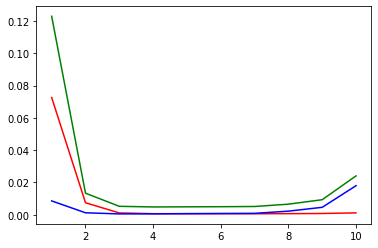

In [8]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

Bias=[]
Variance=[]
Error=[]
Mse=[]
Bias2=[]

file1 = open('test_dataset.pickle','rb')
file2 = open('train_dataset.pickle','rb')

testData = pickle.load(file1)
trainData = pickle.load(file2)
# loading the data from files
X_T = testData[:,0]
Y_T = testData[:,1]
# extracting the respective column values
X_T = X_T[:,np.newaxis]
Y_T = Y_T[:,np.newaxis]
# adding a new dimension# X_T and Y_T contains the test data
trainDatas = np.split(np.random.permutation(trainData),20)
# here we have split the training data into 20 random pieces
X_train = []
Y_train = []

for elem in trainDatas:
    X = elem[:,0]
    X = X[:,np.newaxis]
    X_train.append(X)
    Y = elem[:,1]
    Y = Y[:,np.newaxis]
    Y_train.append(Y)

def result(value):
    bias_temp=[0.0 for i in range(200)]
    biasA_temp = np.array(bias_temp)
    variance_temp=[0.0 for i in range(200)]
    varianceA_temp = np.array(variance_temp)
    mse_temp=[0.0 for i in range(200)]
    mseA_temp = np.array(mse_temp)
    error_temp=[0.0 for i in range(200)]
    errorA_temp = np.array(error_temp)
    for i in range(0,20):
        polynomial_features= PolynomialFeatures(degree=value)
        x_poly = polynomial_features.fit_transform(X_train[i])
        xt_poly = polynomial_features.fit_transform(X_T)
        model = LinearRegression()
        model.fit(x_poly,Y_train[i])
        y_poly_predict = model.predict(xt_poly)
        for j in range (0,200):
            biasA_temp[j]+=y_poly_predict[j]
            varianceA_temp[j]+=(y_poly_predict[j]**2)
            mseA_temp[j]+=((y_poly_predict[j]-Y_T[j])**2)
    biasA_temp /= 20
    varianceA_temp /= 20    
    mseA_temp /= 20    
    for j in range(0,200):
        varianceA_temp[j] = varianceA_temp[j] - biasA_temp[j]**2
        biasA_temp[j] = abs(biasA_temp[j] - Y_T[j])
    for j in range(0,200):
        errorA_temp[j]=(mseA_temp[j]-(biasA_temp[j]**2)-varianceA_temp[j])
    mse = np.mean(mseA_temp)
    bias = np.mean(biasA_temp)
    variance = np.mean(varianceA_temp)
    error = np.mean(errorA_temp)
    Bias.append(bias)
    Variance.append(variance)
    Error.append(error)
    Mse.append(mse)

for i in range(1,16):
    result(i)

myData=[]
for i in range(0,15):
    myData.append([i+1,Bias[i],Variance[i],Error[i],Mse[i]])
head = ["Degree","Bias","Variance","Irreducible Error","MSE"]
print(tabulate(myData,head,tablefmt="grid"))

X_Plot = [1,2,3,4,5,6,7,8,9,10]
Bias2_Plot = []
Variance_Plot = []
Mse_Plot = []

for i in range (0,10):
    Bias2_Plot.append(Bias[i]**2)
    Variance_Plot.append(Variance[i])
    Mse_Plot.append(Mse[i])

plt.plot(X_Plot,Bias2_Plot,label="Bias_Sqaured",color="r")
plt.plot(X_Plot,Variance_Plot,label="Variance",color="b")
plt.plot(X_Plot,Mse_Plot,label="MSE",color="g")
plt.show()
